---
# Econometrics of Marketing
## Project 2: 
### MASTER 2 Eco Stat & D3S 
#### TSE
#### 2021-2022
---
Group : Raquel ALCARAZ, Marie PHILIPPE,  & Claire SERRAZ  
Group C


# Libraries

In [575]:
!pip install catboost
#!pip install xgboost

In [576]:
# Importation of the libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timezone

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [577]:
# Set size and style of the plots
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")

# Change the font and size of the text
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=14)          
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)    
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

# Change the text color
plt.rcParams['text.color'] = "black" 
plt.rcParams['axes.labelcolor'] = "black"
plt.rcParams['xtick.color'] = "black"
plt.rcParams['ytick.color'] = "black"

# Importation of the data

In [578]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [579]:
import os
os.chdir("/content/drive/MyDrive/M2/Marketing/")

In [580]:
# Path for the data
path_data="/content/drive/MyDrive/M2/Marketing/"

# Path for the submissions
path_sub="/content/drive/MyDrive/M2/Marketing/Submission/"

In [581]:
# Loading the data

TRAIN = pd.read_csv(path_data+"Train_transactions.csv")
TEST = pd.read_csv(path_data+"Test_transactions.csv")
TRAIN_customers = pd.read_csv(path_data+"Train_customers_repurchase.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [582]:
# Dataframes copies of the data are created before changes are made

TRAIN_copy = TRAIN.copy()
TEST_copy=TEST.copy()
TRAIN_customers_copy=TRAIN_customers.copy()

In [583]:
TRAIN.head(5)
TRAIN.shape

(3298736, 17)

In [584]:
TEST.head(5)
TEST.shape

(824282, 17)

In [585]:
TRAIN_customers.head(5)
TRAIN_customers.shape

(160424, 2)

In [586]:
# We create a variable Group to know if the observations are in the train or test data set
TRAIN["Group"]="TRAIN"
TEST["Group"]="TEST"

In [587]:
TRAIN_customers.shape

(160424, 2)

In [588]:
# We merge the train et test dataset
df=pd.concat([TRAIN, TEST], axis = "rows")

In [589]:
df['Group'].astype(str).value_counts(normalize=True)*100

TRAIN    80.0078
TEST     19.9922
Name: Group, dtype: float64

In [590]:
# We check the first two observations
df.head(5)

,id_client,transaction_date,stores_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,payment_card,email_domain,civility,zip_code,card_subscription,multicard,price_segmentation,Group
0,37520523,2019-12-26T16:44:00.000Z,12015,57,138.69,0.49,138.20,0,0,1,0,NaN,MME,12420,NaN,0.0,NaN,TRAIN
1,84917629,2019-08-01T12:16:00.000Z,77131,6,9.87,0.00,9.87,0,0,1,0,NaN,MME,77450,NaN,0.0,NaN,TRAIN
2,20962900,2019-09-25T18:10:00.000Z,92786,6,26.25,2.21,24.04,0,0,0,1,GMAIL.COM,MME,92110,NaN,0.0,Quali,TRAIN
3,85917543,2020-01-24T17:34:00.000Z,21554,5,15.08,0.00,15.08,0,0,0,1,SFR.FR,M,21130,NaN,0.0,Mixte,TRAIN
4,6861392,2019-08-22T19:28:00.000Z,83820,25,81.16,30.60,50.56,0,0,0,1,ORANGE.FR,MME,83600,NaN,0.0,Mixte,TRAIN


In [591]:
# We compare the len of the new data frame with the sum of the lens of the train 
# and test data frames. We see that it corresponds.
df.shape

(4123018, 18)

In [592]:
len(TRAIN)+len(TEST)

4123018

# Understanding of the data

In [593]:
# We count the numbers of NaN in each variables
df.isna().sum()

id_client                   0
transaction_date            0
stores_nb                   0
item_count                  0
gross_amount                0
discount_amount             0
basket_value                0
payment_gift                0
payment_cheque              0
payment_cash                0
payment_card                0
email_domain          1601319
civility                 7622
zip_code               378688
card_subscription     3853064
multicard                7622
price_segmentation    1951475
Group                       0
dtype: int64

In [594]:
# We look at a particular client to understand it better
customer_37337120 = df[df.id_client == 37337120]

# Sorting the values by the date of purchase 
# Displaying only the 10 first rows of the data frame
customer_37337120.sort_values("transaction_date").head(30)

,id_client,transaction_date,stores_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,payment_card,email_domain,civility,zip_code,card_subscription,multicard,price_segmentation,Group
1718271,37337120,2019-11-12T16:11:00.000Z,13599,1,0.19,0.00,0.19,0,0,0,0,LAPSOTE.NET,NR,NaN,NaN,0.0,Access,TRAIN
16,37337120,2019-11-19T15:01:00.000Z,13539,2,15.98,0.00,15.98,0,0,0,0,LAPSOTE.NET,NR,NaN,NaN,0.0,Access,TRAIN
2738690,37337120,2019-11-22T17:11:00.000Z,13840,1,0.18,0.00,0.18,0,0,0,0,LAPSOTE.NET,NR,NaN,NaN,0.0,Access,TRAIN
2896804,37337120,2020-01-04T16:47:00.000Z,13599,10,2.80,0.95,1.85,0,0,0,0,LAPSOTE.NET,NR,NaN,NaN,0.0,Access,TRAIN
3283349,37337120,2020-01-10T16:06:00.000Z,13599,1,0.19,0.00,0.19,0,0,0,0,LAPSOTE.NET,NR,NaN,NaN,0.0,Access,TRAIN
1400354,37337120,2020-01-10T16:07:00.000Z,13599,1,0.19,0.00,0.19,0,0,0,0,LAPSOTE.NET,NR,NaN,NaN,0.0,Access,TRAIN


In [595]:
# We look at the types for each variable
df.dtypes

id_client               int64
transaction_date       object
stores_nb               int64
item_count              int64
gross_amount          float64
discount_amount       float64
basket_value          float64
payment_gift            int64
payment_cheque          int64
payment_cash            int64
payment_card            int64
email_domain           object
civility               object
zip_code               object
card_subscription      object
multicard             float64
price_segmentation     object
Group                  object
dtype: object

## Summary statistics

In [596]:
df.describe(include='all')

,id_client,transaction_date,stores_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,payment_card,email_domain,civility,zip_code,card_subscription,multicard,price_segmentation,Group
count,4.123018e+06,4123018,4.123018e+06,4.123018e+06,4.123018e+06,4.123018e+06,4.123018e+06,4.123018e+06,4.123018e+06,4.123018e+06,4.123018e+06,2521699,4115396,3744330,269954,4.115396e+06,2171543,4123018
unique,NaN,291993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2947,3,8515,2302,NaN,5,2
top,NaN,2019-12-24T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GMAIL.COM,MME,13013,01/01/2016,NaN,Mixte,TRAIN
freq,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,643599,2624619,32969,12649,NaN,1219148,3298736
mean,3.528573e+07,NaN,4.466897e+04,1.597219e+01,5.055393e+01,3.494612e+00,4.705932e+01,6.921241e-02,3.340005e-02,2.273553e-01,6.788425e-01,NaN,NaN,NaN,NaN,6.287852e-02,NaN,NaN
std,2.816511e+07,NaN,2.840495e+04,1.739582e+01,6.272378e+01,1.073524e+01,5.650075e+01,2.538150e-01,1.796789e-01,4.191240e-01,4.669212e-01,NaN,NaN,NaN,NaN,2.518239e-01,NaN,NaN
min,2.910000e+02,NaN,1.238000e+03,-2.880000e+02,-2.602980e+03,-1.131970e+03,-2.342680e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,1.171123e+07,NaN,2.000100e+04,5.000000e+00,1.324000e+01,0.000000e+00,1.292000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
50%,3.166619e+07,NaN,3.820600e+04,1.000000e+01,3.022000e+01,0.000000e+00,2.918000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
75%,3.850206e+07,NaN,7.334200e+04,2.100000e+01,6.774000e+01,2.240000e+00,6.219000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN


* transaction_date

In [597]:
# Min and max dates
print(f'min: {df["transaction_date"].min()}')
print(f'max: {df["transaction_date"].max()}')

min: 2019-08-01T00:23:00.000Z
max: 2020-07-31T23:55:00.000Z


*   stores_nb



In [598]:
df['stores_nb'].describe()

count    4.123018e+06
mean     4.466897e+04
std      2.840495e+04
min      1.238000e+03
25%      2.000100e+04
50%      3.820600e+04
75%      7.334200e+04
max      9.963400e+04
Name: stores_nb, dtype: float64

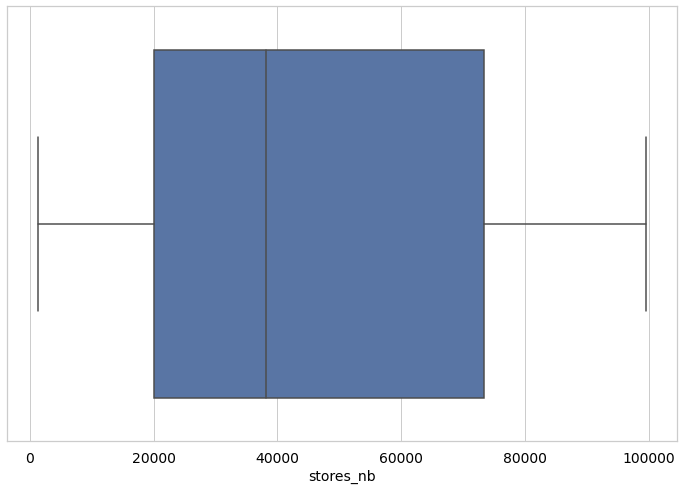

In [599]:
sns.boxplot(x=df['stores_nb'])



*   item_count



In [600]:
df['item_count'].describe()

count    4.123018e+06
mean     1.597219e+01
std      1.739582e+01
min     -2.880000e+02
25%      5.000000e+00
50%      1.000000e+01
75%      2.100000e+01
max      3.600000e+03
Name: item_count, dtype: float64

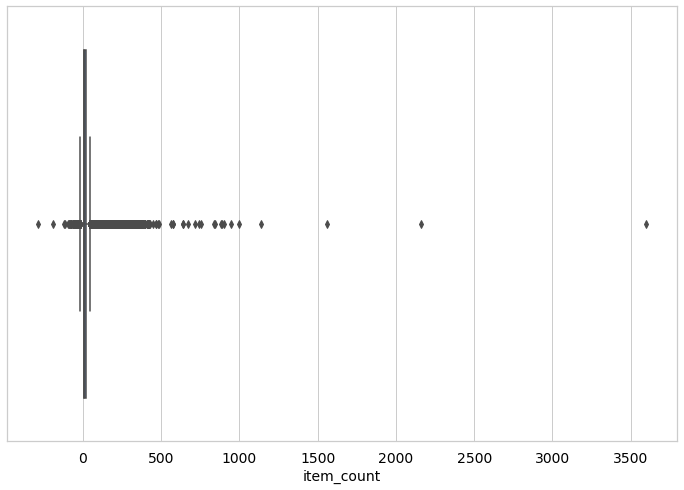

In [601]:
sns.boxplot(x=df['item_count'])


*   gross_amount



In [602]:
df['gross_amount'].describe()

count    4.123018e+06
mean     5.055393e+01
std      6.272378e+01
min     -2.602980e+03
25%      1.324000e+01
50%      3.022000e+01
75%      6.774000e+01
max      2.306485e+04
Name: gross_amount, dtype: float64

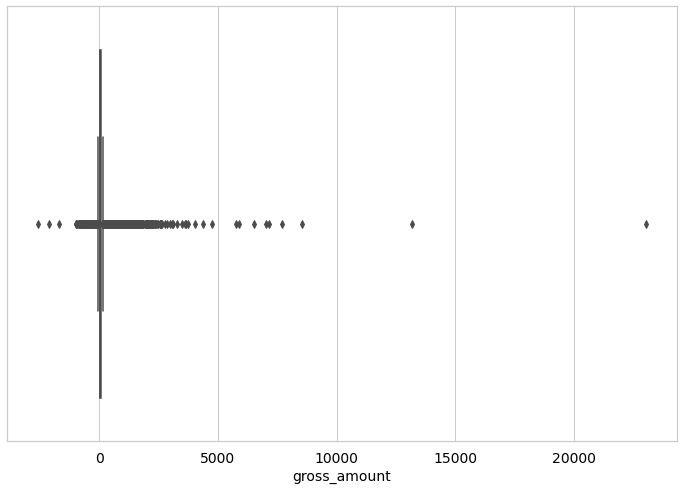

In [603]:
sns.boxplot(x=df['gross_amount'])

* discount_amount

In [604]:
df['discount_amount'].describe()

count    4.123018e+06
mean     3.494612e+00
std      1.073524e+01
min     -1.131970e+03
25%      0.000000e+00
50%      0.000000e+00
75%      2.240000e+00
max      3.087360e+03
Name: discount_amount, dtype: float64

In [605]:
df["discount_amount"].astype(str).value_counts(normalize=True)*100

0.0       61.442322
10.0       2.133607
12.0       0.873438
8.0        0.619328
0.18       0.524494
            ...    
174.72     0.000024
-11.55     0.000024
96.93      0.000024
121.35     0.000024
472.06     0.000024
Name: discount_amount, Length: 14113, dtype: float64

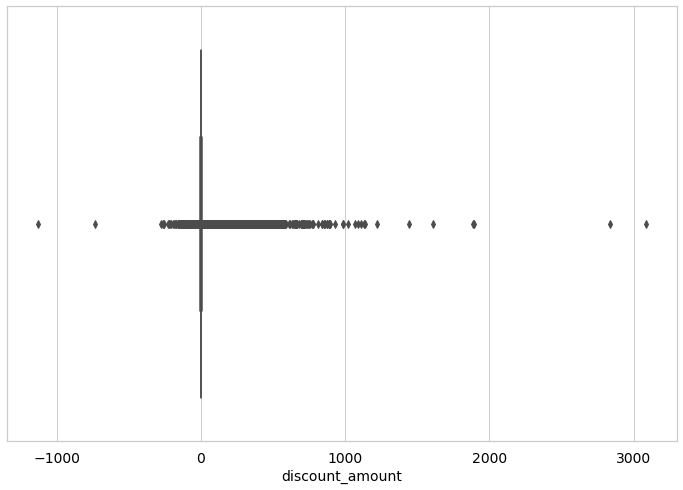

In [606]:
sns.boxplot(x=df['discount_amount'])



*   basket_value



In [607]:
df['basket_value'].describe()

count    4.123018e+06
mean     4.705932e+01
std      5.650075e+01
min     -2.342680e+03
25%      1.292000e+01
50%      2.918000e+01
75%      6.219000e+01
max      2.022748e+04
Name: basket_value, dtype: float64

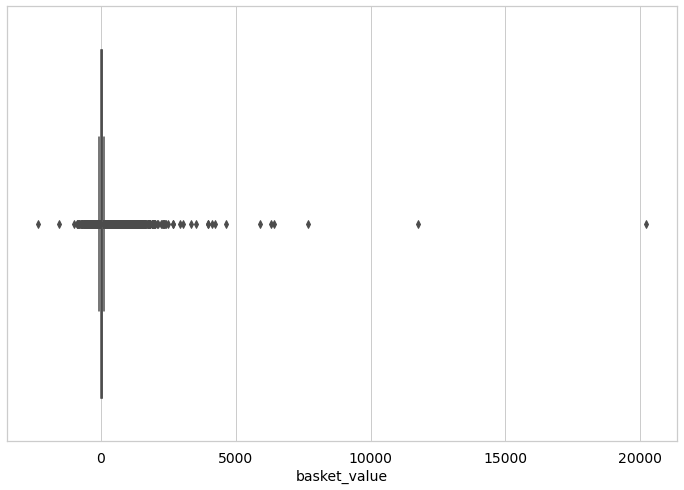

In [608]:
sns.boxplot(x=df['basket_value'])

* Payments

In [609]:
# We compute the frequencies for each kind of payment

freq_gift = df["payment_gift"].astype(str).value_counts(normalize=True)*100
freq_cheque = df["payment_cheque"].astype(str).value_counts(normalize=True)*100
freq_cash = df["payment_cash"].astype(str).value_counts(normalize=True)*100
freq_card = df["payment_card"].astype(str).value_counts(normalize=True)*100

In [610]:
print(freq_gift)
print(freq_cheque)
print(freq_cash)
print(freq_card)

0    93.078759
1     6.921241
Name: payment_gift, dtype: float64
0    96.659995
1     3.340005
Name: payment_cheque, dtype: float64
0    77.26447
1    22.73553
Name: payment_cash, dtype: float64
1    67.884254
0    32.115746
Name: payment_card, dtype: float64




*   payment_gift



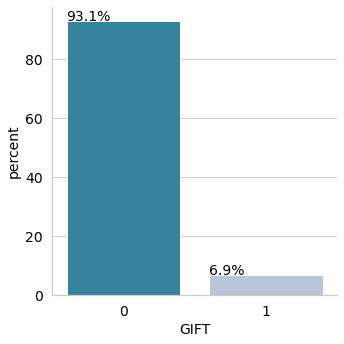

In [611]:
# We draw the barplot of the variable payment_gift

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (freq_gift.shape[0]):
   l.append({"GIFT":freq_gift.index[i], "percent":freq_gift[i]})

# We transform this dictionnary into a dataframe
df_gift = pd.DataFrame(l)

# We plot the barplot (without the frequencies)
g = sns.catplot(x = "GIFT", y = "percent", kind= 'bar',data = df_gift, palette = 'PuBuGn_r')

# We add the frequencies at the top of each bar
for p in g.ax.patches:
   txt = str(p.get_height().round(1)) + '%'
   txt_x = p.get_x()
   txt_y = p.get_height()
   g.ax.text(txt_x,txt_y,txt)



*   payment_cash



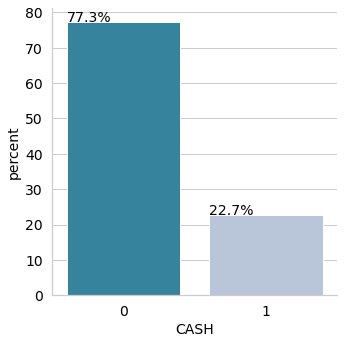

In [612]:
# We draw the barplot of the variable payment_cash

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (freq_cash.shape[0]):
   l.append({"CASH":freq_cash.index[i], "percent":freq_cash[i]})

# We transform this dictionnary into a dataframe
df_cash = pd.DataFrame(l)

# We plot the barplot (without the frequencies)
g = sns.catplot(x = "CASH", y = "percent", kind= 'bar',data = df_cash, palette = 'PuBuGn_r')

# We add the frequencies at the top of each bar
for p in g.ax.patches:
   txt = str(p.get_height().round(1)) + '%'
   txt_x = p.get_x()
   txt_y = p.get_height()
   g.ax.text(txt_x,txt_y,txt)



*   payment_card



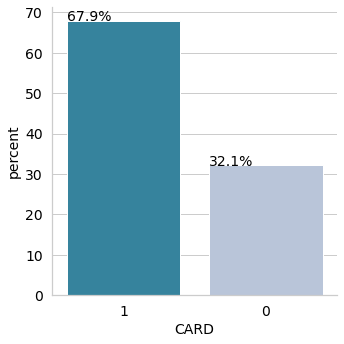

In [613]:
# We draw the barplot of the variable payment_card

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (freq_card.shape[0]):
   l.append({"CARD":freq_card.index[i], "percent":freq_card[i]})

# We transform this dictionnary into a dataframe
df_card = pd.DataFrame(l)

# We plot the barplot (without the frequencies)
g = sns.catplot(x = "CARD", y = "percent", kind= 'bar',data = df_card, palette = 'PuBuGn_r')

# We add the frequencies at the top of each bar
for p in g.ax.patches:
   txt = str(p.get_height().round(1)) + '%'
   txt_x = p.get_x()
   txt_y = p.get_height()
   g.ax.text(txt_x,txt_y,txt)



*   payment_cheque



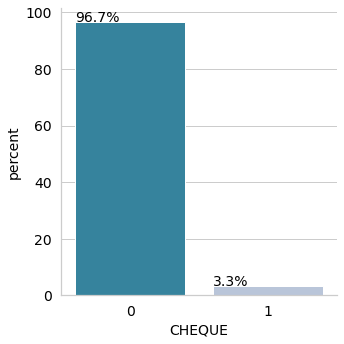

In [614]:
# We draw the barplot of the variable payment_cheque

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (freq_cheque.shape[0]):
   l.append({"CHEQUE":freq_cheque.index[i], "percent":freq_cheque[i]})

# We transform this dictionnary into a dataframe
df_cheque = pd.DataFrame(l)

# We plot the barplot (without the frequencies)
g = sns.catplot(x = "CHEQUE", y = "percent", kind= 'bar',data = df_cheque, palette = 'PuBuGn_r')

# We add the frequencies at the top of each bar
for p in g.ax.patches:
   txt = str(p.get_height().round(1)) + '%'
   txt_x = p.get_x()
   txt_y = p.get_height()
   g.ax.text(txt_x,txt_y,txt)

* email_domain

In [615]:
# Frequency

freq_email=df["email_domain"].astype(str).value_counts(normalize=True)*100
print(freq_email)

nan                      38.838516
GMAIL.COM                15.609900
HOTMAIL.FR                8.784172
ORANGE.FR                 7.782018
WANADOO.FR                4.098357
                           ...    
BATI-ARCHITECTURE.COM     0.000024
GO4MAIL.NET               0.000024
MSCENE.FR                 0.000024
NETPLUS.CH                0.000024
CADONE.IT                 0.000024
Name: email_domain, Length: 2948, dtype: float64


* civility

In [616]:
# Frequency

freq_civility = df["civility"].astype(str).value_counts(normalize=True)*100
freq_civility

MME    63.657714
M      27.141259
NR      9.016162
nan     0.184865
Name: civility, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


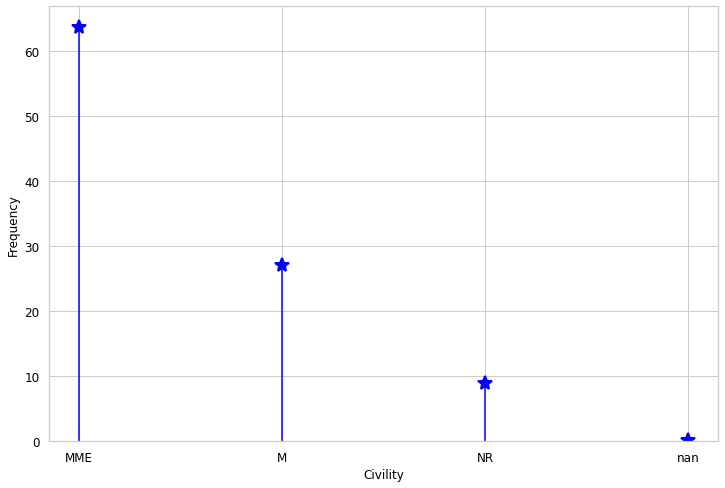

In [617]:
# We draw the barplot of the variable civility

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (freq_civility.shape[0]):
   l.append({"CIVILITY":freq_civility.index[i], "percent":freq_civility[i]})

# We transform this dictionnary into a dataframe
df_civility = pd.DataFrame(l)


(markerline, stemlines, baseline) = plt.stem(df_civility['CIVILITY'],
                                             df_civility['percent'])
plt.setp(markerline, marker='*', markersize=15,
         markeredgewidth=2, color='blue')
plt.setp(stemlines, color='blue')
plt.setp(baseline, visible=False)

plt.tick_params(labelsize=12)
plt.xlabel('Civility', size=12)
plt.ylabel('Frequency', size=12)
plt.ylim(bottom=0)

plt.show()

* zip_code

In [618]:
# Frequency

freq_zip = df["zip_code"].astype(str).value_counts(normalize=True)*100
print(freq_zip)
print(len(freq_zip))

nan        9.184728
13013      0.799633
83600      0.715883
34070      0.707880
13009      0.656315
             ...   
92410.0    0.000024
71870.0    0.000024
44720      0.000024
06211      0.000024
3740       0.000024
Name: zip_code, Length: 8516, dtype: float64
8516




*   multicard



In [619]:
# Frequency

freq_multicard = df["multicard"].astype(str).value_counts(normalize=True)*100
freq_multicard

0.0     93.560251
1.0      6.253817
nan      0.184865
21.0     0.001067
Name: multicard, dtype: float64

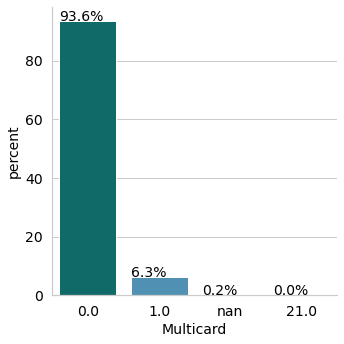

In [620]:
# We draw the barplot of the variable multicard

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (freq_multicard.shape[0]):
   l.append({"Multicard":freq_multicard.index[i], "percent":freq_multicard[i]})

# We transform this dictionnary into a dataframe
df_multicard = pd.DataFrame(l)

# We plot the barplot (without the frequencies)
g = sns.catplot(x = "Multicard", y = "percent", kind= 'bar',data = df_multicard, palette = 'PuBuGn_r')

# We add the frequencies at the top of each bar
for p in g.ax.patches:
   txt = str(p.get_height().round(1)) + '%'
   txt_x = p.get_x()
   txt_y = p.get_height()
   g.ax.text(txt_x,txt_y,txt)



*   price_segmentation



In [621]:
# Frequency

freq_price = df["price_segmentation"].astype(str).value_counts(normalize=True)*100
freq_price

nan       47.331227
Mixte     29.569311
Quali     10.943319
Access    10.129134
xx         2.025943
08         0.001067
Name: price_segmentation, dtype: float64

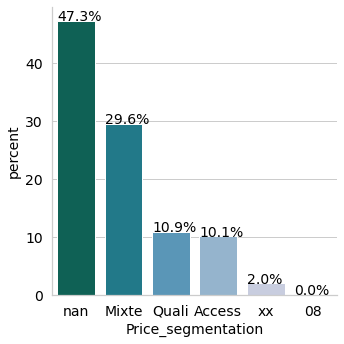

In [622]:
# We draw the barplot of the variable price_segmentation

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (freq_price.shape[0]):
   l.append({"Price_segmentation":freq_price.index[i], "percent":freq_price[i]})

# We transform this dictionnary into a dataframe
df_price = pd.DataFrame(l)

# We plot the barplot (without the frequencies)
g = sns.catplot(x = "Price_segmentation", y = "percent", kind= 'bar',data = df_price, palette = 'PuBuGn_r')

# We add the frequencies at the top of each bar
for p in g.ax.patches:
   txt = str(p.get_height().round(1)) + '%'
   txt_x = p.get_x()
   txt_y = p.get_height()
   g.ax.text(txt_x,txt_y,txt)

In [623]:
df.dtypes

id_client               int64
transaction_date       object
stores_nb               int64
item_count              int64
gross_amount          float64
discount_amount       float64
basket_value          float64
payment_gift            int64
payment_cheque          int64
payment_cash            int64
payment_card            int64
email_domain           object
civility               object
zip_code               object
card_subscription      object
multicard             float64
price_segmentation     object
Group                  object
dtype: object

## Cleaning and creation of variables

* transaction_date

In [624]:
# We change the date format
df['transaction_date']=pd.to_datetime(df.transaction_date)

In [625]:
max_date=df["transaction_date"].max()
max_date

Timestamp('2020-07-31 23:55:00+0000', tz='UTC')

* Negative values

In [626]:
# We delete the irrevelant negative values

df['item_count']=np.where(df['item_count']<0,np.nan,df['item_count'])
df['gross_amount']=np.where(df['gross_amount']<0,np.nan,df['gross_amount'])
df['discount_amount']=np.where(df['discount_amount']<0,np.nan,df['discount_amount'])
df['basket_value']=np.where(df['basket_value']<0,np.nan,df['basket_value'])

* item_count

In [627]:
# We change to NA the item_count of individuals that bought more than 8000 items
# It might be very big families not representative of the population
df['item_count']=np.where(df['item_count']>500,np.nan,df['item_count'])

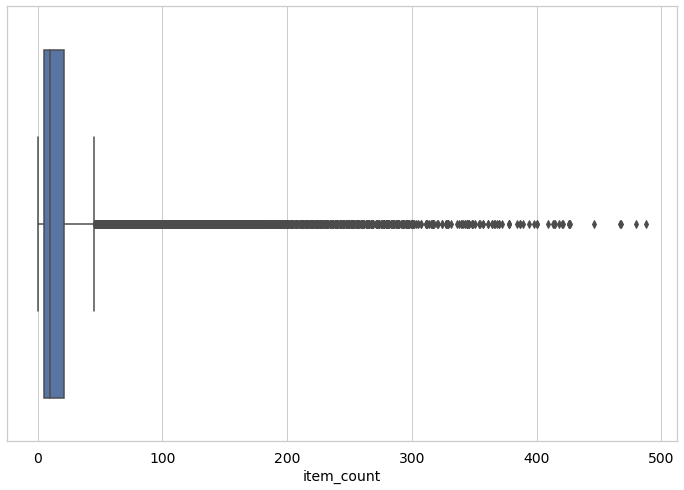

In [628]:
# Boxplot
sns.boxplot(x=df['item_count'])

* gross_amount

In [629]:
# We change to NA the gross_count of individuals that paid more than 10000 before discount
df['gross_amount']=np.where(df['gross_amount']>5000,np.nan,df['gross_amount'])

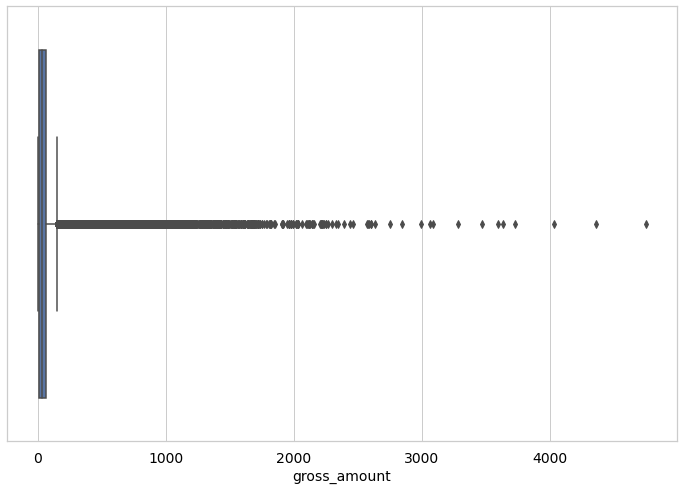

In [630]:
# Boxplot
sns.boxplot(x=df['gross_amount'])

* dicount_amount

In [631]:
# We change to NA the discount_amount of individuals that had a discount of more than what they paid 

df['discount_amount']=np.where(df['gross_amount']<df['discount_amount'],np.nan,df['discount_amount'])

# We change to NA the discount_amount of individuals that had a discount of more than 1000

df['discount_amount']=np.where(df['discount_amount']>1000,np.nan,df['discount_amount'])

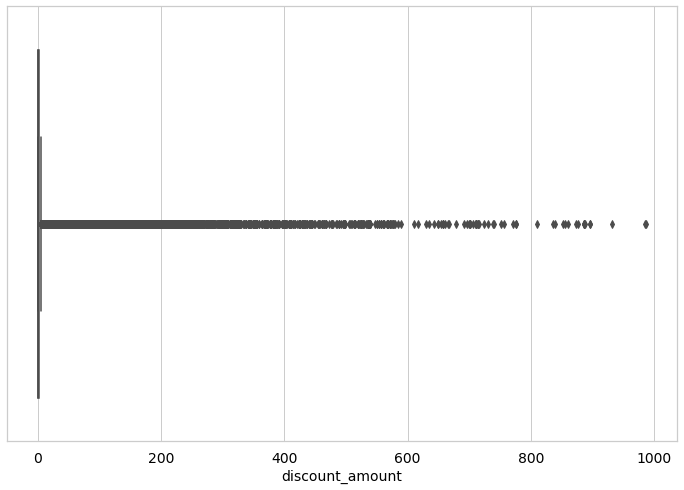

In [632]:
# Boxplot
sns.boxplot(x=df['discount_amount'])

* basket_value

In [633]:
# We change to NA the basket_value of individuals that paid more than 5000

df['basket_value']=np.where(df['basket_value']>5000,np.nan,df['basket_value'])

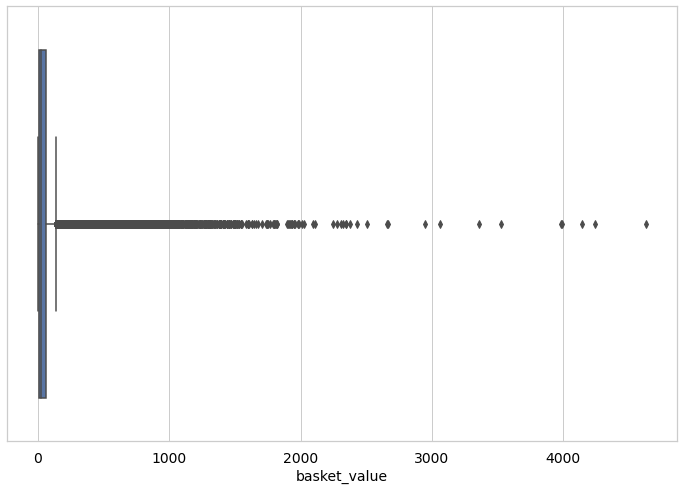

In [634]:
# Boxplot
sns.boxplot(x=df['basket_value'])

* email_domain

In [635]:
# Know the root of emails
df["email_domain_root"]=df["email_domain"].str.split('.').str[-2]
df["email_domain_root"].astype(str).value_counts(normalize=True)*100

nan        38.844119
GMAIL      15.725495
HOTMAIL    11.675064
ORANGE      7.811244
YAHOO       4.654067
             ...    
IPCV        0.000024
YOKLER      0.000024
WJDH        0.000024
IOPMAIL     0.000024
FAIM        0.000024
Name: email_domain_root, Length: 2465, dtype: float64

In [636]:
# Create dummies for the email roots

df['gmail']=np.where(df['email_domain_root']=='GMAIL',1,0)
df['hotmail']=np.where(df['email_domain_root']=='HOTMAIL',1,0)
df['orange']=np.where(df['email_domain_root']=='ORANGE',1,0)
df['yahoo']=np.where(df['email_domain_root']=='YAHOO',1,0)

df['other_mail']=np.where(df['email_domain_root']=='GMAIL',0,
                              np.where(df['email_domain_root']=='HOTMAIL',0,
                                      np.where(df['email_domain_root']=='ORANGE',0,
                                               np.where(df['email_domain_root']=='YAHOO',0,
                                                       np.where(df['email_domain_root'].isna()==True,0,1)))))

* card_subscription

In [637]:
# Delete value that is not a date
df['card_subscription']=np.where(df['card_subscription']=='RÉPUBLIQUE DÉMOCRATIQUE"',np.nan,df['card_subscription'])

# We change the date format
df['card_subscription']=pd.to_datetime(df.card_subscription)

# Min and max dates
print(f'min: {df["card_subscription"].min()}')
print(f'max: {df["card_subscription"].max()}')

min: 1996-10-12 00:00:00
max: 2020-12-06 00:00:00


* price_segmentation

In [638]:
# Change xx and 08 to missing value because they don't have any sense

df['price_segmentation']=np.where(df['price_segmentation']=='xx',np.nan,df['price_segmentation'])
df['price_segmentation']=np.where(df['price_segmentation']=='08',np.nan,df['price_segmentation'])

# Data at the individual level

## Create new data at the individual level

In [639]:
# Checking if the price_segmentation changes for a customer
tmp=df.groupby('id_client')["price_segmentation"].nunique().reset_index()
tmp["price_segmentation"].astype(str).value_counts(normalize=True)*100

0    60.373012
1    39.626988
Name: price_segmentation, dtype: float64

In [640]:
# Checking if the email domain changes for a customer
tmp=df.groupby('id_client')["email_domain"].nunique().reset_index()
tmp["email_domain"].astype(str).value_counts(normalize=True)*100

1    54.654665
0    45.345335
Name: email_domain, dtype: float64

In [641]:
# We duplicate the transaction_date so we can extract the recency after

df['last_date']=df['transaction_date']

In [642]:
# We create a list containing each variable to be grouped in a single row per customer

aggregation_functions = {'transaction_date': 'count', 'last_date': 'max','item_count': 'sum', 'gross_amount' : 'sum',
                         'discount_amount':'sum', 'basket_value': 'sum', 'payment_gift': 'sum', 
                         'payment_cheque': 'sum', 'payment_cash':'sum', 'gmail': 'first', 'hotmail': 'first',
                         'yahoo': 'first', 'orange': 'first', 'other_mail': 'first',
                         'payment_card':'sum',
                         'civility':'first', 'zip_code': 'first', 'card_subscription': 'first', 
                         'multicard': 'sum','price_segmentation': 'first', 'Group':'first'}

# We create a new data frame grouping by customer_id from the initial data set
df_new = df.groupby('id_client').aggregate(aggregation_functions).reset_index()

In [643]:
df_new.head(10)

,id_client,transaction_date,last_date,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,civility,zip_code,card_subscription,multicard,price_segmentation,Group
0,291,55,2020-07-31 19:52:00+00:00,1499.0,4151.43,119.99,4031.44,5,0,0,0,0,0,0,0,55,MME,92220,NaT,0.0,Quali,TRAIN
1,365,25,2020-06-09 11:53:00+00:00,140.0,390.05,1.97,388.08,1,0,11,1,0,0,0,0,14,M,75011,NaT,0.0,Quali,TRAIN
2,1800,78,2020-07-25 09:43:00+00:00,1961.0,7900.33,879.23,7021.10,21,0,3,0,0,0,0,1,75,MME,93230,NaT,0.0,Mixte,TRAIN
3,2098,36,2020-07-23 10:58:00+00:00,577.0,1697.54,52.98,1644.56,6,3,7,0,0,0,0,0,26,MME,38130,NaT,0.0,Quali,TEST
4,3399,103,2020-07-31 11:54:00+00:00,1372.0,4285.57,57.11,4228.46,1,16,8,0,0,0,0,0,81,MME,38130,NaT,0.0,Quali,TEST
5,3471,60,2020-03-14 11:17:00+00:00,406.0,1203.76,8.53,1195.23,0,0,53,0,0,0,0,0,7,MME,93500,NaT,0.0,Mixte,TRAIN
6,3712,80,2020-07-29 12:31:00+00:00,834.0,2234.37,195.78,2038.59,1,0,1,0,0,0,0,1,74,M,75011,NaT,0.0,Mixte,TEST
7,3961,3,2019-09-25 19:37:00+00:00,131.0,415.34,1.62,413.72,0,0,1,0,0,0,0,1,2,MME,75013,NaT,0.0,None,TRAIN
8,4146,24,2020-07-10 19:39:00+00:00,618.0,1725.98,20.01,1705.97,1,0,2,0,0,0,0,0,22,MME,06160,NaT,0.0,Mixte,TRAIN
9,4409,4,2020-06-12 16:55:00+00:00,32.0,155.19,0.00,155.19,0,0,0,0,0,0,0,0,4,MME,29430,NaT,0.0,Mixte,TRAIN


In [644]:
df_new.shape

(200530, 22)

In [645]:
# Get number of different stores in which the customers went
stores = df.groupby('id_client')["stores_nb"].nunique().reset_index()
stores

,id_client,stores_nb
0,291,1
1,365,1
2,1800,4
3,2098,1
4,3399,1
...,...,...
200525,88010343,2
200526,88010368,1
200527,88010370,1
200528,88010377,1


In [646]:
# Merge datasets to have the stores_nb 
df_ind=stores.merge(df_new, on='id_client', how='left')
df_ind

,id_client,stores_nb,transaction_date,last_date,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,civility,zip_code,card_subscription,multicard,price_segmentation,Group
0,291,1,55,2020-07-31 19:52:00+00:00,1499.0,4151.43,119.99,4031.44,5,0,0,0,0,0,0,0,55,MME,92220,NaT,0.0,Quali,TRAIN
1,365,1,25,2020-06-09 11:53:00+00:00,140.0,390.05,1.97,388.08,1,0,11,1,0,0,0,0,14,M,75011,NaT,0.0,Quali,TRAIN
2,1800,4,78,2020-07-25 09:43:00+00:00,1961.0,7900.33,879.23,7021.10,21,0,3,0,0,0,0,1,75,MME,93230,NaT,0.0,Mixte,TRAIN
3,2098,1,36,2020-07-23 10:58:00+00:00,577.0,1697.54,52.98,1644.56,6,3,7,0,0,0,0,0,26,MME,38130,NaT,0.0,Quali,TEST
4,3399,1,103,2020-07-31 11:54:00+00:00,1372.0,4285.57,57.11,4228.46,1,16,8,0,0,0,0,0,81,MME,38130,NaT,0.0,Quali,TEST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200525,88010343,2,4,2019-12-04 15:29:00+00:00,39.0,107.12,0.68,106.44,0,0,0,0,0,0,0,0,4,MME,42140,NaT,0.0,Mixte,TEST
200526,88010368,1,11,2020-07-11 18:39:00+00:00,256.0,973.93,25.83,948.10,1,0,0,0,0,0,0,0,11,MME,70300,NaT,0.0,Mixte,TRAIN
200527,88010370,1,24,2020-07-14 11:54:00+00:00,619.0,1556.50,39.06,1517.44,0,10,6,0,0,0,0,0,8,MME,14140,NaT,0.0,Access,TRAIN
200528,88010377,1,4,2020-05-22 12:17:00+00:00,33.0,110.50,8.12,102.38,0,0,2,0,0,0,0,1,2,MME,56300,NaT,0.0,Mixte,TEST


## Summary statistics

In [647]:
df_ind.describe()

,id_client,stores_nb,transaction_date,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,multicard
count,2.005300e+05,200530.000000,200530.000000,200530.000000,200530.000000,200530.000000,200530.000000,200530.000000,200530.000000,200530.000000,200530.000000,200530.000000,200530.000000,200530.000000,200530.000000,200530.000000,200530.000000
mean,3.754481e+07,1.484596,20.560604,328.418955,1040.718652,72.039890,968.805387,1.423049,0.686725,4.674562,0.151184,0.106458,0.042398,0.062405,0.184077,13.957413,1.290430
std,2.602165e+07,0.923261,36.330442,585.688976,2039.368367,322.484095,1787.779199,4.875887,4.363767,16.612051,0.358229,0.308424,0.201495,0.241890,0.387548,23.954682,14.128515
min,2.910000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.797049e+07,1.000000,2.000000,28.000000,94.360000,0.000000,90.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.396942e+07,1.000000,8.000000,105.000000,344.435000,8.000000,330.065000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.896918e+07,2.000000,25.000000,367.000000,1136.490000,40.770000,1085.972500,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
max,8.801040e+07,27.000000,3019.000000,29013.000000,148949.480000,36123.890000,119978.500000,543.000000,177.000000,1905.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1038.000000,2456.000000


* transaction_date

In [648]:
df_ind['transaction_date'].describe()

count    200530.000000
mean         20.560604
std          36.330442
min           1.000000
25%           2.000000
50%           8.000000
75%          25.000000
max        3019.000000
Name: transaction_date, dtype: float64

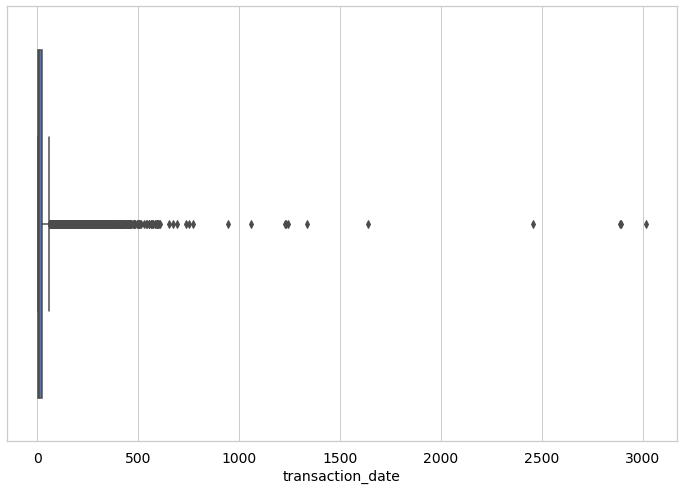

In [649]:
# Boxplot of the number of visits
sns.boxplot(x=df_ind['transaction_date'])

*   stores_nb

In [650]:
df_ind['stores_nb'].describe()

count    200530.000000
mean          1.484596
std           0.923261
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          27.000000
Name: stores_nb, dtype: float64

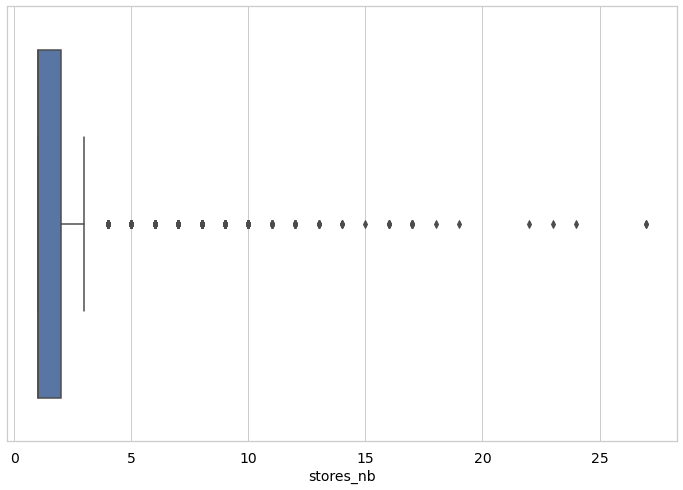

In [651]:
# Boxplot of the number of different stores in which the customers went
sns.boxplot(x=df_ind['stores_nb'])



*   item_count



In [652]:
df_ind['item_count'].describe()

count    200530.000000
mean        328.418955
std         585.688976
min           0.000000
25%          28.000000
50%         105.000000
75%         367.000000
max       29013.000000
Name: item_count, dtype: float64

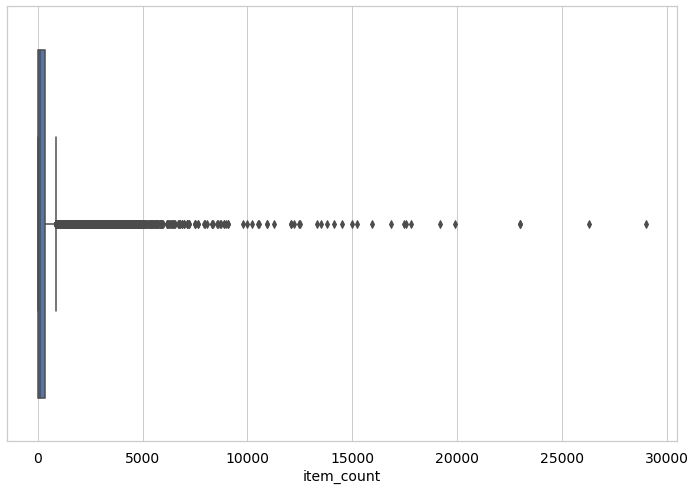

In [653]:
sns.boxplot(x=df_ind['item_count'])


*   gross_amount




In [654]:
df_ind['gross_amount'].describe()

count    200530.000000
mean       1040.718652
std        2039.368367
min           0.000000
25%          94.360000
50%         344.435000
75%        1136.490000
max      148949.480000
Name: gross_amount, dtype: float64

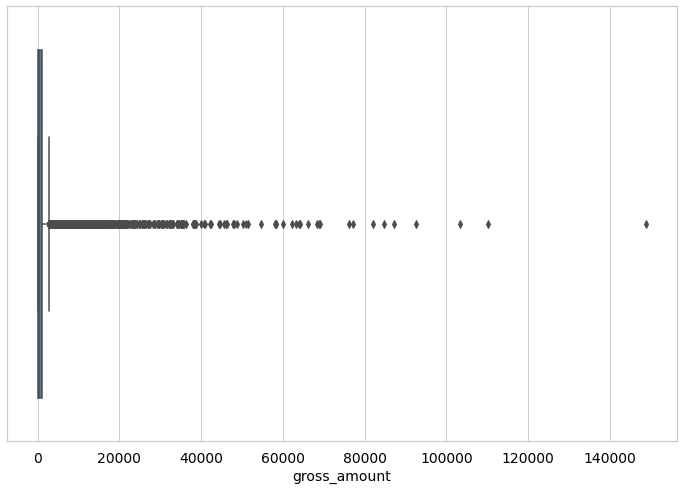

In [655]:
sns.boxplot(x=df_ind['gross_amount'])



*   discount_amount




In [656]:
df_ind['discount_amount'].describe()

count    200530.000000
mean         72.039890
std         322.484095
min           0.000000
25%           0.000000
50%           8.000000
75%          40.770000
max       36123.890000
Name: discount_amount, dtype: float64

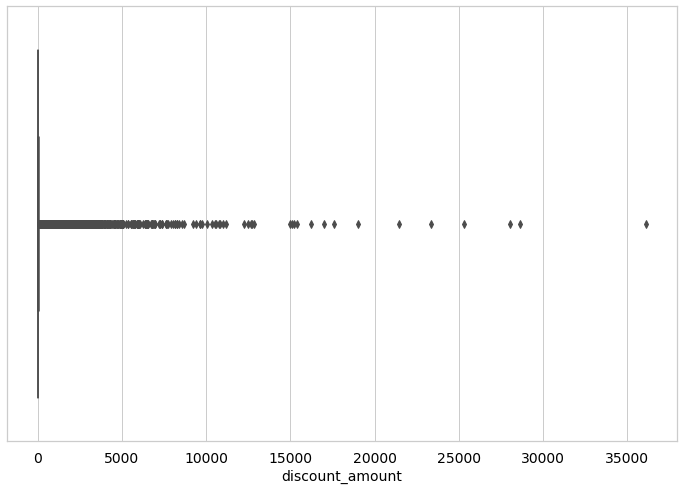

In [657]:
sns.boxplot(x=df_ind['discount_amount'])



*   bastet_value



In [658]:
df_ind['basket_value'].describe()

count    200530.000000
mean        968.805387
std        1787.779199
min           0.000000
25%          90.590000
50%         330.065000
75%        1085.972500
max      119978.500000
Name: basket_value, dtype: float64

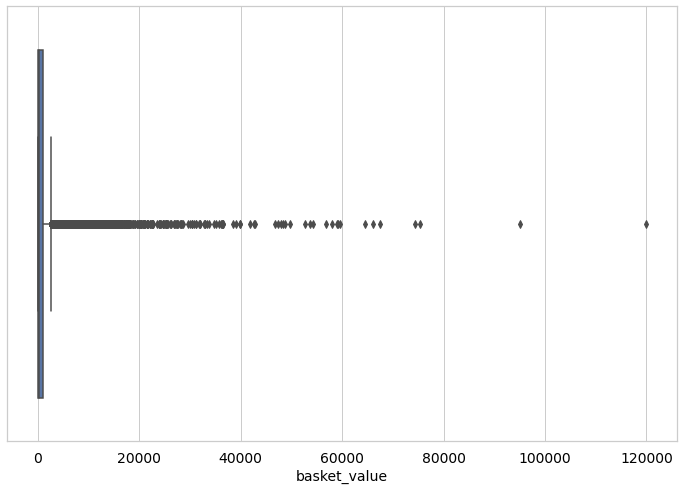

In [659]:
sns.boxplot(x=df_ind['basket_value'])



*   Payments



In [660]:
# Description of payment_gift
df_ind['payment_gift'].describe()

count    200530.000000
mean          1.423049
std           4.875887
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         543.000000
Name: payment_gift, dtype: float64

In [661]:
# Description of payment_cheque
df_ind['payment_cheque'].describe()

count    200530.000000
mean          0.686725
std           4.363767
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         177.000000
Name: payment_cheque, dtype: float64

In [662]:
# Description of payment_cash
df_ind['payment_cash'].describe()

count    200530.000000
mean          4.674562
std          16.612051
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max        1905.000000
Name: payment_cash, dtype: float64

In [663]:
# Description of payment_card
df_ind['payment_card'].describe()

count    200530.000000
mean         13.957413
std          23.954682
min           0.000000
25%           1.000000
50%           5.000000
75%          16.000000
max        1038.000000
Name: payment_card, dtype: float64

In [664]:
payment = df_ind[["payment_gift","payment_cheque","payment_cash","payment_card"]].sum().reset_index()
payment.columns = ['Payment type', 'Number of times']
payment

,Payment type,Number of times
0,payment_gift,285364
1,payment_cheque,137709
2,payment_cash,937390
3,payment_card,2798880


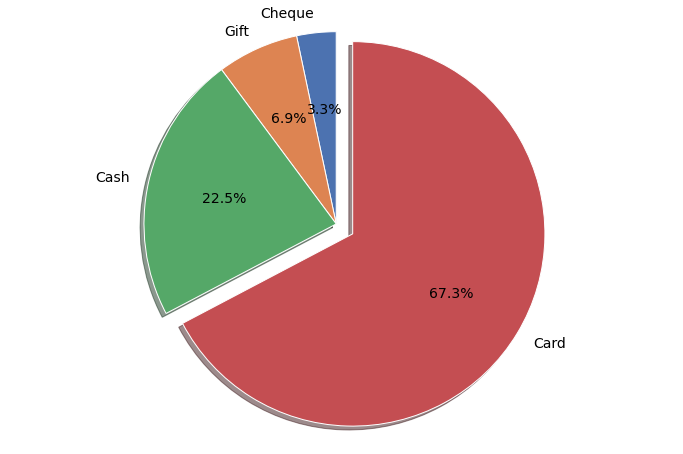

In [665]:
# Pie chart of the different types of payments
labels = ["Cheque", "Gift", "Cash", "Card"]
sizes = [137709, 285364, 937390, 2798880]
explode = (0, 0, 0, 0.1)  # only "explode" the 4th slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


*   civility



In [666]:
# Frequency

freq_civility = df_ind["civility"].astype(str).value_counts(normalize=True)*100
freq_civility

MME     58.371316
M       23.148157
NR      18.030719
None     0.449808
Name: civility, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


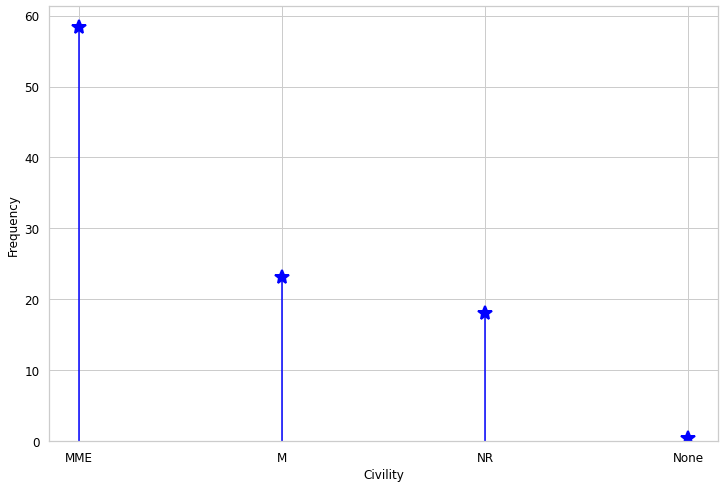

In [667]:
# We draw the barplot of the variable civility

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (freq_civility.shape[0]):
   l.append({"CIVILITY":freq_civility.index[i], "percent":freq_civility[i]})

# We transform this dictionnary into a dataframe
df_civility = pd.DataFrame(l)

(markerline, stemlines, baseline) = plt.stem(df_civility['CIVILITY'],
                                             df_civility['percent'])
plt.setp(markerline, marker='*', markersize=15,
         markeredgewidth=2, color='blue')
plt.setp(stemlines, color='blue')
plt.setp(baseline, visible=False)

plt.tick_params(labelsize=12)
plt.xlabel('Civility', size=12)
plt.ylabel('Frequency', size=12)
plt.ylim(bottom=0)

plt.show()



*   zip_code



In [668]:
# Frequency

freq_zip = df_ind["zip_code"].astype(str).value_counts(normalize=True)*100
print(freq_zip)
print(len(freq_zip))

None       19.002643
34070       0.506657
25000       0.448811
13013       0.444323
21000       0.440333
             ...    
66540       0.000499
60350       0.000499
68000.0     0.000499
74360       0.000499
1131        0.000499
Name: zip_code, Length: 7745, dtype: float64
7745




*   card_subscription



In [669]:
df_ind['card_subscription'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6161
unique                   2301
top       2016-01-01 00:00:00
freq                      179
first     1996-10-12 00:00:00
last      2020-12-06 00:00:00
Name: card_subscription, dtype: object



*   multicard



In [670]:
df_ind['multicard'].describe()

count    200530.000000
mean          1.290430
std          14.128515
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2456.000000
Name: multicard, dtype: float64

In [671]:
freq_multicard = df_ind["multicard"].astype(str).value_counts(normalize=True)*100
freq_multicard

0.0      96.937117
1.0       0.151100
2.0       0.142622
3.0       0.103226
4.0       0.099237
           ...    
204.0     0.000499
340.0     0.000499
349.0     0.000499
343.0     0.000499
187.0     0.000499
Name: multicard, Length: 319, dtype: float64

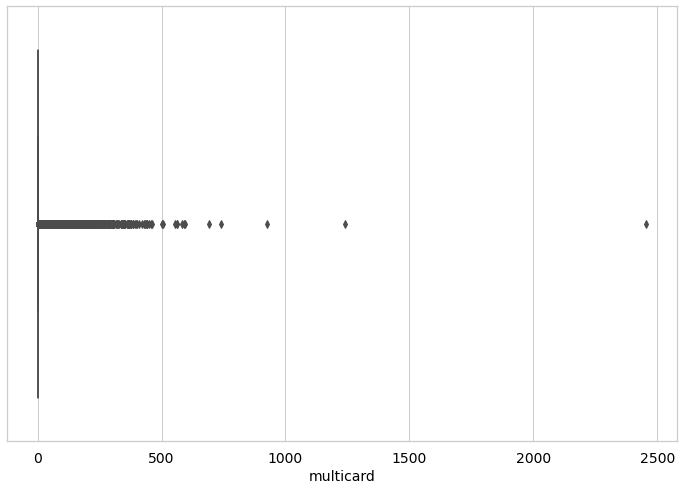

In [672]:
sns.boxplot(x=df_ind["multicard"])

* price_segmentation

In [673]:
df_ind['price_segmentation'].describe()

count     79464
unique        3
top       Mixte
freq      45322
Name: price_segmentation, dtype: object

In [674]:
# Frequency

price_segmentation = df_ind["price_segmentation"].astype(str).value_counts(normalize=True)*100
price_segmentation

None      60.373012
Mixte     22.601107
Quali      8.884456
Access     8.141425
Name: price_segmentation, dtype: float64

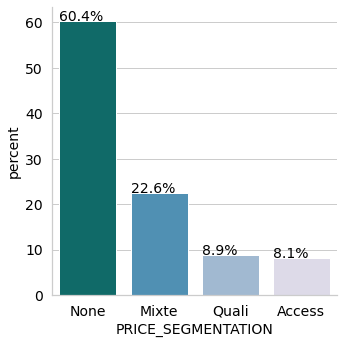

In [675]:
# We draw the barplot of the variable price_segmentation

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (price_segmentation.shape[0]):
   l.append({"PRICE_SEGMENTATION":price_segmentation.index[i], "percent":price_segmentation[i]})

# We transform this dictionnary into a dataframe
df_price_segmentation = pd.DataFrame(l)

# We plot the barplot (without the frequencies)
g = sns.catplot(x = "PRICE_SEGMENTATION", y = "percent", kind= 'bar',data = df_price_segmentation, 
                palette = 'PuBuGn_r')

# We add the frequencies at the top of each bar
for p in g.ax.patches:
   txt = str(p.get_height().round(1)) + '%'
   txt_x = p.get_x()
   txt_y = p.get_height()
   g.ax.text(txt_x,txt_y,txt)

## Cleaning data and adding variable

* transaction_date

In [676]:
# Renaming the variables

df_ind = df_ind.rename({'transaction_date': 'visits_nb'}, axis='columns')
df_ind.head()

,id_client,stores_nb,visits_nb,last_date,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,civility,zip_code,card_subscription,multicard,price_segmentation,Group
0,291,1,55,2020-07-31 19:52:00+00:00,1499.0,4151.43,119.99,4031.44,5,0,0,0,0,0,0,0,55,MME,92220,NaT,0.0,Quali,TRAIN
1,365,1,25,2020-06-09 11:53:00+00:00,140.0,390.05,1.97,388.08,1,0,11,1,0,0,0,0,14,M,75011,NaT,0.0,Quali,TRAIN
2,1800,4,78,2020-07-25 09:43:00+00:00,1961.0,7900.33,879.23,7021.10,21,0,3,0,0,0,0,1,75,MME,93230,NaT,0.0,Mixte,TRAIN
3,2098,1,36,2020-07-23 10:58:00+00:00,577.0,1697.54,52.98,1644.56,6,3,7,0,0,0,0,0,26,MME,38130,NaT,0.0,Quali,TEST
4,3399,1,103,2020-07-31 11:54:00+00:00,1372.0,4285.57,57.11,4228.46,1,16,8,0,0,0,0,0,81,MME,38130,NaT,0.0,Quali,TEST


* civility

In [677]:
# Coding the civility variable 

df_ind["civility"] = pd.DataFrame(df_ind["civility"]).replace({"civility": {"MME" : "3", 
                             "M" : "2", "NR" : "1"}})

df_ind.civility.fillna(value=0, inplace=True)

freq_civility = df_ind["civility"].astype(str).value_counts(normalize=True)*100
freq_civility

3    58.371316
2    23.148157
1    18.030719
0     0.449808
Name: civility, dtype: float64

In [678]:
df_ind['civility']=df_ind['civility'].astype(int)

* card_subscription

In [679]:
# Card subscription: dummy = 1 if they have one, 0 otherwise

df_ind["card_subscription_dummy"] = np.where(pd.isna(df_ind["card_subscription"])==True,0,1)
df_ind

,id_client,stores_nb,visits_nb,last_date,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,civility,zip_code,card_subscription,multicard,price_segmentation,Group,card_subscription_dummy
0,291,1,55,2020-07-31 19:52:00+00:00,1499.0,4151.43,119.99,4031.44,5,0,0,0,0,0,0,0,55,3,92220,NaT,0.0,Quali,TRAIN,0
1,365,1,25,2020-06-09 11:53:00+00:00,140.0,390.05,1.97,388.08,1,0,11,1,0,0,0,0,14,2,75011,NaT,0.0,Quali,TRAIN,0
2,1800,4,78,2020-07-25 09:43:00+00:00,1961.0,7900.33,879.23,7021.10,21,0,3,0,0,0,0,1,75,3,93230,NaT,0.0,Mixte,TRAIN,0
3,2098,1,36,2020-07-23 10:58:00+00:00,577.0,1697.54,52.98,1644.56,6,3,7,0,0,0,0,0,26,3,38130,NaT,0.0,Quali,TEST,0
4,3399,1,103,2020-07-31 11:54:00+00:00,1372.0,4285.57,57.11,4228.46,1,16,8,0,0,0,0,0,81,3,38130,NaT,0.0,Quali,TEST,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200525,88010343,2,4,2019-12-04 15:29:00+00:00,39.0,107.12,0.68,106.44,0,0,0,0,0,0,0,0,4,3,42140,NaT,0.0,Mixte,TEST,0
200526,88010368,1,11,2020-07-11 18:39:00+00:00,256.0,973.93,25.83,948.10,1,0,0,0,0,0,0,0,11,3,70300,NaT,0.0,Mixte,TRAIN,0
200527,88010370,1,24,2020-07-14 11:54:00+00:00,619.0,1556.50,39.06,1517.44,0,10,6,0,0,0,0,0,8,3,14140,NaT,0.0,Access,TRAIN,0
200528,88010377,1,4,2020-05-22 12:17:00+00:00,33.0,110.50,8.12,102.38,0,0,2,0,0,0,0,1,2,3,56300,NaT,0.0,Mixte,TEST,0


* price_segmentation

In [680]:
# Coding the price_segmentation variable 

df_ind["price_segmentation"] = pd.DataFrame(df_ind["price_segmentation"]).replace({"price_segmentation": 
                        {"Mixte" : "3", "Quali" : "2", "Access" : "1"}})

df_ind.price_segmentation.fillna(value=0, inplace=True)

freq_price_segmentation = df_ind["price_segmentation"].astype(str).value_counts(normalize=True)*100
freq_price_segmentation

0    60.373012
3    22.601107
2     8.884456
1     8.141425
Name: price_segmentation, dtype: float64

In [681]:
df_ind['price_segmentation']=df_ind['price_segmentation'].astype(int)

* recency

In [682]:
# Recency

df_ind["recency"] = (max_date - df_ind["last_date"])/np.timedelta64(1, 'D')
df_ind

,id_client,stores_nb,visits_nb,last_date,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,civility,zip_code,card_subscription,multicard,price_segmentation,Group,card_subscription_dummy,recency
0,291,1,55,2020-07-31 19:52:00+00:00,1499.0,4151.43,119.99,4031.44,5,0,0,0,0,0,0,0,55,3,92220,NaT,0.0,2,TRAIN,0,0.168750
1,365,1,25,2020-06-09 11:53:00+00:00,140.0,390.05,1.97,388.08,1,0,11,1,0,0,0,0,14,2,75011,NaT,0.0,2,TRAIN,0,52.501389
2,1800,4,78,2020-07-25 09:43:00+00:00,1961.0,7900.33,879.23,7021.10,21,0,3,0,0,0,0,1,75,3,93230,NaT,0.0,3,TRAIN,0,6.591667
3,2098,1,36,2020-07-23 10:58:00+00:00,577.0,1697.54,52.98,1644.56,6,3,7,0,0,0,0,0,26,3,38130,NaT,0.0,2,TEST,0,8.539583
4,3399,1,103,2020-07-31 11:54:00+00:00,1372.0,4285.57,57.11,4228.46,1,16,8,0,0,0,0,0,81,3,38130,NaT,0.0,2,TEST,0,0.500694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200525,88010343,2,4,2019-12-04 15:29:00+00:00,39.0,107.12,0.68,106.44,0,0,0,0,0,0,0,0,4,3,42140,NaT,0.0,3,TEST,0,240.351389
200526,88010368,1,11,2020-07-11 18:39:00+00:00,256.0,973.93,25.83,948.10,1,0,0,0,0,0,0,0,11,3,70300,NaT,0.0,3,TRAIN,0,20.219444
200527,88010370,1,24,2020-07-14 11:54:00+00:00,619.0,1556.50,39.06,1517.44,0,10,6,0,0,0,0,0,8,3,14140,NaT,0.0,1,TRAIN,0,17.500694
200528,88010377,1,4,2020-05-22 12:17:00+00:00,33.0,110.50,8.12,102.38,0,0,2,0,0,0,0,1,2,3,56300,NaT,0.0,3,TEST,0,70.484722


In [683]:
df_ind.dtypes

id_client                                int64
stores_nb                                int64
visits_nb                                int64
last_date                  datetime64[ns, UTC]
item_count                             float64
gross_amount                           float64
discount_amount                        float64
basket_value                           float64
payment_gift                             int64
payment_cheque                           int64
payment_cash                             int64
gmail                                    int64
hotmail                                  int64
yahoo                                    int64
orange                                   int64
other_mail                               int64
payment_card                             int64
civility                                 int64
zip_code                                object
card_subscription               datetime64[ns]
multicard                              float64
price_segment

## Check number of individuals

In [684]:
df_ind.shape

(200530, 25)

In [685]:
df_ind['Group'].astype(str).value_counts(normalize=True)*100

TRAIN    80.0
TEST     20.0
Name: Group, dtype: float64

In [686]:
df_ind.isna().sum()

id_client                       0
stores_nb                       0
visits_nb                       0
last_date                       0
item_count                      0
gross_amount                    0
discount_amount                 0
basket_value                    0
payment_gift                    0
payment_cheque                  0
payment_cash                    0
gmail                           0
hotmail                         0
yahoo                           0
orange                          0
other_mail                      0
payment_card                    0
civility                        0
zip_code                    38106
card_subscription          194369
multicard                       0
price_segmentation              0
Group                           0
card_subscription_dummy         0
recency                         0
dtype: int64

## We resplit Train and Test

In [687]:
TRAIN_clean=df_ind[df_ind['Group']=='TRAIN']
TEST_final=df_ind[df_ind['Group']=='TEST']

In [688]:
TRAIN_clean.head(5)

,id_client,stores_nb,visits_nb,last_date,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,civility,zip_code,card_subscription,multicard,price_segmentation,Group,card_subscription_dummy,recency
0,291,1,55,2020-07-31 19:52:00+00:00,1499.0,4151.43,119.99,4031.44,5,0,0,0,0,0,0,0,55,3,92220,NaT,0.0,2,TRAIN,0,0.168750
1,365,1,25,2020-06-09 11:53:00+00:00,140.0,390.05,1.97,388.08,1,0,11,1,0,0,0,0,14,2,75011,NaT,0.0,2,TRAIN,0,52.501389
2,1800,4,78,2020-07-25 09:43:00+00:00,1961.0,7900.33,879.23,7021.10,21,0,3,0,0,0,0,1,75,3,93230,NaT,0.0,3,TRAIN,0,6.591667
5,3471,2,60,2020-03-14 11:17:00+00:00,406.0,1203.76,8.53,1195.23,0,0,53,0,0,0,0,0,7,3,93500,NaT,0.0,3,TRAIN,0,139.526389
7,3961,1,3,2019-09-25 19:37:00+00:00,131.0,415.34,1.62,413.72,0,0,1,0,0,0,0,1,2,3,75013,NaT,0.0,0,TRAIN,0,310.179167


In [689]:
TRAIN_clean.shape

(160424, 25)

In [690]:
TEST_final.head(5)

,id_client,stores_nb,visits_nb,last_date,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,civility,zip_code,card_subscription,multicard,price_segmentation,Group,card_subscription_dummy,recency
3,2098,1,36,2020-07-23 10:58:00+00:00,577.0,1697.54,52.98,1644.56,6,3,7,0,0,0,0,0,26,3,38130,NaT,0.0,2,TEST,0,8.539583
4,3399,1,103,2020-07-31 11:54:00+00:00,1372.0,4285.57,57.11,4228.46,1,16,8,0,0,0,0,0,81,3,38130,NaT,0.0,2,TEST,0,0.500694
6,3712,2,80,2020-07-29 12:31:00+00:00,834.0,2234.37,195.78,2038.59,1,0,1,0,0,0,0,1,74,2,75011,NaT,0.0,3,TEST,0,2.475000
11,4664,1,51,2020-07-28 09:18:00+00:00,789.0,1996.28,50.27,1946.01,2,50,1,0,0,0,0,0,0,2,92220,NaT,0.0,1,TEST,0,3.609028
16,6741,1,17,2020-03-11 14:51:00+00:00,391.0,1185.50,1.00,1184.50,0,16,0,0,0,0,0,0,1,3,29890,NaT,0.0,0,TEST,0,142.377778


In [691]:
TEST_final.shape

(40106, 25)

In [692]:
len(TRAIN_clean)+len(TEST_final)

200530

In [693]:
# We merge the train et test dataset
TRAIN_final=TRAIN_clean.merge(TRAIN_customers, on='id_client', how='left')

In [694]:
TRAIN_final.head(5)

,id_client,stores_nb,visits_nb,last_date,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,civility,zip_code,card_subscription,multicard,price_segmentation,Group,card_subscription_dummy,recency,repurchase
0,291,1,55,2020-07-31 19:52:00+00:00,1499.0,4151.43,119.99,4031.44,5,0,0,0,0,0,0,0,55,3,92220,NaT,0.0,2,TRAIN,0,0.168750,0
1,365,1,25,2020-06-09 11:53:00+00:00,140.0,390.05,1.97,388.08,1,0,11,1,0,0,0,0,14,2,75011,NaT,0.0,2,TRAIN,0,52.501389,0
2,1800,4,78,2020-07-25 09:43:00+00:00,1961.0,7900.33,879.23,7021.10,21,0,3,0,0,0,0,1,75,3,93230,NaT,0.0,3,TRAIN,0,6.591667,1
3,3471,2,60,2020-03-14 11:17:00+00:00,406.0,1203.76,8.53,1195.23,0,0,53,0,0,0,0,0,7,3,93500,NaT,0.0,3,TRAIN,0,139.526389,0
4,3961,1,3,2019-09-25 19:37:00+00:00,131.0,415.34,1.62,413.72,0,0,1,0,0,0,0,1,2,3,75013,NaT,0.0,0,TRAIN,0,310.179167,0


In [695]:
TRAIN_final.dtypes

id_client                                int64
stores_nb                                int64
visits_nb                                int64
last_date                  datetime64[ns, UTC]
item_count                             float64
gross_amount                           float64
discount_amount                        float64
basket_value                           float64
payment_gift                             int64
payment_cheque                           int64
payment_cash                             int64
gmail                                    int64
hotmail                                  int64
yahoo                                    int64
orange                                   int64
other_mail                               int64
payment_card                             int64
civility                                 int64
zip_code                                object
card_subscription               datetime64[ns]
multicard                              float64
price_segment

TRAIN_final.shape

## Defining x train, y train, x test, y test

In [696]:
# Good for xgboost
X_train1=pd.DataFrame(TRAIN_final.drop(columns=["repurchase", "last_date","zip_code",
                                               "Group","card_subscription", "multicard"])) 
Y_train1=pd.DataFrame(TRAIN_final["repurchase"])

X_test1=pd.DataFrame(TEST_final.drop(columns=["last_date","zip_code",
                                              "Group","card_subscription", "multicard"]))

X_train11, X_val11, Y_train11, Y_val11 = train_test_split(X_train1, Y_train1, test_size=0.2, random_state=0)

In [697]:
# Good for catboost
X_train2=pd.DataFrame(TRAIN_final.drop(columns=["repurchase","last_date","zip_code",
                                               "Group","card_subscription", "multicard", "gmail", "hotmail",
                                               "yahoo","orange", "other_mail","stores_nb"])) 
Y_train2=pd.DataFrame(TRAIN_final["repurchase"])

X_test2=pd.DataFrame(TEST_final.drop(columns=["last_date","zip_code",
                                               "Group","card_subscription", "multicard", "gmail", "hotmail",
                                               "yahoo","orange", "other_mail","stores_nb"]))

X_train22, X_val22, Y_train22, Y_val22 = train_test_split(X_train2, Y_train2, test_size=0.2, random_state=0)

In [698]:
X_train1.dtypes

id_client                    int64
stores_nb                    int64
visits_nb                    int64
item_count                 float64
gross_amount               float64
discount_amount            float64
basket_value               float64
payment_gift                 int64
payment_cheque               int64
payment_cash                 int64
gmail                        int64
hotmail                      int64
yahoo                        int64
orange                       int64
other_mail                   int64
payment_card                 int64
civility                     int64
price_segmentation           int64
card_subscription_dummy      int64
recency                    float64
dtype: object

In [699]:
cat_features1=[10,11,12,13,14,16,17,18]

In [700]:
X_train2.dtypes

id_client                    int64
visits_nb                    int64
item_count                 float64
gross_amount               float64
discount_amount            float64
basket_value               float64
payment_gift                 int64
payment_cheque               int64
payment_cash                 int64
payment_card                 int64
civility                     int64
price_segmentation           int64
card_subscription_dummy      int64
recency                    float64
dtype: object

In [701]:
cat_features2=[10,11,12]

# Analysis


* XGBoost

In [702]:
XGB = XGBClassifier()

XGB.fit(X_train11,np.ravel(Y_train11.values))

pred_XGB = XGB.predict_proba(X_val11)

log_loss_xgb = metrics.log_loss(np.ravel(Y_val11.values), pred_XGB[:,1])
log_loss_xgb

0.20526543321998017

In [703]:
XGB = XGBClassifier()

XGB.fit(X_train22,np.ravel(Y_train22.values))

pred_XGB = XGB.predict_proba(X_val22)

log_loss_xgb = metrics.log_loss(np.ravel(Y_val22.values), pred_XGB[:,1])
log_loss_xgb

0.20524798785587034

In [704]:
XGB = XGBClassifier()

XGB.fit(X_train1,np.ravel(Y_train1.values))

pred_XGB = XGB.predict_proba(X_test1)
pred_XGB = pd.DataFrame({"id_client": X_test1["id_client"], "repurchase": pred_XGB[:,1]})

sub_XGB=pred_XGB.to_csv(path_sub+"submission_XGB.csv", index=False)
sub_XGB

* Optimized XGBoost 

In [705]:
XGB_opti = XGBClassifier(learning_rate=0.1,
 n_estimators=120,
 max_depth=6,
 min_child_weight=4,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.9,
 reg_alpha=1,
 objective= 'binary:logistic',
 seed=4)

XGB_opti.fit(X_train11,np.ravel(Y_train11.values))

pred_XGB_opti = XGB_opti.predict_proba(X_val11)

log_loss_XGB_opti = metrics.log_loss(np.ravel(Y_val11.values), pred_XGB_opti[:,1])
log_loss_XGB_opti

0.20376207962091122

In [706]:
XGB_opti = XGBClassifier(learning_rate=0.1,
 n_estimators=120,
 max_depth=6,
 min_child_weight=4,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.9,
 reg_alpha=1,
 objective= 'binary:logistic',
 seed=4)

XGB_opti.fit(X_train1,np.ravel(Y_train1.values))

pred_XGB_opti = XGB_opti.predict_proba(X_test1)

pred_XGB_opti = pd.DataFrame({"id_client": X_test1["id_client"], "repurchase": pred_XGB_opti[:,1]})

sub_XGB_opti=pred_XGB_opti.to_csv(path_sub+"submission_XGB_opti.csv", index=False)
sub_XGB_opti

In [707]:
# Contribution of variables to the model
XGB_opti.feature_importances_

array([0.02607924, 0.02238884, 0.24775678, 0.06571658, 0.02215073,
       0.02267727, 0.02301618, 0.02179855, 0.0222235 , 0.04129069,
       0.01690446, 0.01813519, 0.01277782, 0.01936076, 0.01764185,
       0.0813153 , 0.02438254, 0.02139985, 0.01836894, 0.25461495],
      dtype=float32)

* Catboost

In [708]:
# CatBoostClassifier
cb = CatBoostClassifier(iterations=15,random_seed=4)

# Fit model
cb.fit(X_train11, np.ravel(Y_train11.values), cat_features1)

# Get predicted probabilities for each class
pred_cb = cb.predict_proba(X_val11)

log_loss_ct = metrics.log_loss(np.ravel(Y_val11.values), pred_cb[:,1])
log_loss_ct

Learning rate set to 0.5
0:	learn: 0.2823579	total: 93.9ms	remaining: 1.31s
1:	learn: 0.2208194	total: 181ms	remaining: 1.18s
2:	learn: 0.2085380	total: 279ms	remaining: 1.12s
3:	learn: 0.2054545	total: 378ms	remaining: 1.04s
4:	learn: 0.2015080	total: 471ms	remaining: 943ms
5:	learn: 0.2008309	total: 561ms	remaining: 841ms
6:	learn: 0.2003240	total: 637ms	remaining: 728ms
7:	learn: 0.1999233	total: 742ms	remaining: 649ms
8:	learn: 0.1995879	total: 832ms	remaining: 555ms
9:	learn: 0.1988973	total: 929ms	remaining: 465ms
10:	learn: 0.1982311	total: 1.02s	remaining: 372ms
11:	learn: 0.1979901	total: 1.11s	remaining: 278ms
12:	learn: 0.1978259	total: 1.2s	remaining: 185ms
13:	learn: 0.1977458	total: 1.3s	remaining: 92.7ms
14:	learn: 0.1974024	total: 1.39s	remaining: 0us


0.20672877909605428

In [709]:
# CatBoostClassifier
cb = CatBoostClassifier(iterations=15,random_seed=4)

# Fit model
cb.fit(X_train22, np.ravel(Y_train22.values), cat_features2)

# Get predicted probabilities for each class
pred_cb = cb.predict_proba(X_val22)

log_loss_ct = metrics.log_loss(np.ravel(Y_val22.values), pred_cb[:,1])
log_loss_ct

Learning rate set to 0.5
0:	learn: 0.4043328	total: 55.6ms	remaining: 779ms
1:	learn: 0.3008962	total: 101ms	remaining: 656ms
2:	learn: 0.2518561	total: 150ms	remaining: 599ms
3:	learn: 0.2277562	total: 207ms	remaining: 569ms
4:	learn: 0.2149179	total: 255ms	remaining: 511ms
5:	learn: 0.2080213	total: 307ms	remaining: 461ms
6:	learn: 0.2045551	total: 375ms	remaining: 429ms
7:	learn: 0.2024148	total: 428ms	remaining: 374ms
8:	learn: 0.2012250	total: 485ms	remaining: 323ms
9:	learn: 0.2002577	total: 531ms	remaining: 265ms
10:	learn: 0.1997839	total: 577ms	remaining: 210ms
11:	learn: 0.1991163	total: 627ms	remaining: 157ms
12:	learn: 0.1988829	total: 675ms	remaining: 104ms
13:	learn: 0.1983408	total: 721ms	remaining: 51.5ms
14:	learn: 0.1981367	total: 768ms	remaining: 0us


0.20532630709562824

In [710]:
# CatBoostClassifier
cb = CatBoostClassifier(iterations=15,random_seed=4)

# Fit model
cb.fit(X_train2, np.ravel(Y_train2.values), cat_features2)

# Get predicted probabilities for each class
pred_cb = cb.predict_proba(X_test2)

pred_cb = pd.DataFrame({"id_client": X_test2["id_client"], "repurchase": pred_cb[:,1]})

sub_cb=pred_cb.to_csv(path_sub+"submission_cb.csv", index=False)
sub_cb

Learning rate set to 0.5
0:	learn: 0.4062082	total: 68.2ms	remaining: 954ms
1:	learn: 0.3013608	total: 132ms	remaining: 858ms
2:	learn: 0.2534912	total: 194ms	remaining: 775ms
3:	learn: 0.2288898	total: 253ms	remaining: 696ms
4:	learn: 0.2165606	total: 309ms	remaining: 617ms
5:	learn: 0.2094430	total: 364ms	remaining: 546ms
6:	learn: 0.2058074	total: 421ms	remaining: 481ms
7:	learn: 0.2034130	total: 475ms	remaining: 415ms
8:	learn: 0.2024963	total: 530ms	remaining: 353ms
9:	learn: 0.2015494	total: 589ms	remaining: 294ms
10:	learn: 0.2011307	total: 658ms	remaining: 239ms
11:	learn: 0.2006233	total: 715ms	remaining: 179ms
12:	learn: 0.2005488	total: 764ms	remaining: 118ms
13:	learn: 0.2002005	total: 820ms	remaining: 58.6ms
14:	learn: 0.1999980	total: 879ms	remaining: 0us


* Optimized catboost

In [711]:
cb = CatBoostClassifier(loss_function='Logloss', learning_rate=0.5, random_seed=4, silent=True)

parameters = {
    'iterations':range(5,25,5),
    'depth':range(4,10,1)}

opti_cb = GridSearchCV(cb, parameters, cv=5, scoring='accuracy')

opti_cb.fit(X_train22,np.ravel(Y_train22.values))

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f6be9aada50>,
             param_grid={'depth': range(4, 10), 'iterations': range(5, 25, 5)},
             scoring='accuracy')

In [712]:
opti_cb.best_params_, opti_cb.best_score_

({'depth': 6, 'iterations': 15}, 0.9268032250044123)

In [713]:
# CatBoostClassifier
opti_cb = CatBoostClassifier(iterations=15,
                           learning_rate=0.5,
                           depth=6,
                           random_seed=4,
                           loss_function='Logloss')

# Fit model
opti_cb.fit(X_train2, np.ravel(Y_train2.values), cat_features2)

# Get predicted probabilities for each class
pred_opti_cb = opti_cb.predict_proba(X_test2)

pred_opti_cb = pd.DataFrame({"id_client": X_test2["id_client"], "repurchase": pred_opti_cb[:,1]})

sub_opti_cb=pred_opti_cb.to_csv(path_sub+"submission_opti_cb.csv", index=False)
sub_opti_cb

0:	learn: 0.4062082	total: 67.1ms	remaining: 939ms
1:	learn: 0.3013608	total: 130ms	remaining: 844ms
2:	learn: 0.2534912	total: 185ms	remaining: 742ms
3:	learn: 0.2288898	total: 250ms	remaining: 688ms
4:	learn: 0.2165606	total: 309ms	remaining: 618ms
5:	learn: 0.2094430	total: 364ms	remaining: 545ms
6:	learn: 0.2058074	total: 418ms	remaining: 477ms
7:	learn: 0.2034130	total: 471ms	remaining: 412ms
8:	learn: 0.2024963	total: 543ms	remaining: 362ms
9:	learn: 0.2015494	total: 609ms	remaining: 304ms
10:	learn: 0.2011307	total: 695ms	remaining: 253ms
11:	learn: 0.2006233	total: 755ms	remaining: 189ms
12:	learn: 0.2005488	total: 809ms	remaining: 124ms
13:	learn: 0.2002005	total: 866ms	remaining: 61.9ms
14:	learn: 0.1999980	total: 927ms	remaining: 0us


In [714]:
# Contribution of variables to the model
opti_cb.feature_importances_

array([4.43319161e+00, 2.81984960e+01, 2.26210682e+00, 4.79024598e-01,
       1.56478261e+00, 3.88553047e+00, 2.93038769e-02, 1.80990291e-01,
       3.11177010e-01, 1.26967284e+00, 0.00000000e+00, 8.54090815e-01,
       1.52353545e-01, 5.63792795e+01])

###Customer's behaviour based on probabilities from XGBoost optimized

In [715]:
# We load the csv file from XGBoost optimized
SUB_XGB=pd.read_csv(path_sub+"submission_XGB_opti.csv")

* Merge

In [716]:
# We merge the probabilities results from XGBoost optimized and we merge them with Test set
df_proba=TEST_final.merge(SUB_XGB, on='id_client', how='left')
df_proba.head()

,id_client,stores_nb,visits_nb,last_date,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,civility,zip_code,card_subscription,multicard,price_segmentation,Group,card_subscription_dummy,recency,repurchase
0,2098,1,36,2020-07-23 10:58:00+00:00,577.0,1697.54,52.98,1644.56,6,3,7,0,0,0,0,0,26,3,38130,NaT,0.0,2,TEST,0,8.539583,0.226773
1,3399,1,103,2020-07-31 11:54:00+00:00,1372.0,4285.57,57.11,4228.46,1,16,8,0,0,0,0,0,81,3,38130,NaT,0.0,2,TEST,0,0.500694,0.298658
2,3712,2,80,2020-07-29 12:31:00+00:00,834.0,2234.37,195.78,2038.59,1,0,1,0,0,0,0,1,74,2,75011,NaT,0.0,3,TEST,0,2.475000,0.353563
3,4664,1,51,2020-07-28 09:18:00+00:00,789.0,1996.28,50.27,1946.01,2,50,1,0,0,0,0,0,0,2,92220,NaT,0.0,1,TEST,0,3.609028,0.230353
4,6741,1,17,2020-03-11 14:51:00+00:00,391.0,1185.50,1.00,1184.50,0,16,0,0,0,0,0,0,1,3,29890,NaT,0.0,0,TEST,0,142.377778,0.009655


In [717]:
df_proba.describe()

,id_client,stores_nb,visits_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,civility,multicard,price_segmentation,card_subscription_dummy,recency,repurchase
count,4.010600e+04,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.000000,40106.00000,40106.000000,40106.000000
mean,3.766548e+07,1.482197,20.552586,326.883434,1038.461728,71.994586,966.673405,1.425896,0.677879,4.703311,0.152795,0.104797,0.042138,0.062435,0.184511,14.014312,2.391213,1.335112,0.947315,0.03012,100.152670,0.077372
std,2.600387e+07,0.920392,37.511759,582.382583,2104.873295,328.760062,1842.488480,5.374860,4.280827,17.863061,0.359794,0.306296,0.200907,0.241946,0.387905,24.428324,0.792589,14.116111,1.266405,0.17092,109.411978,0.119325
min,2.098000e+03,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.009028,0.000420
25%,1.815497e+07,1.000000,2.000000,27.000000,93.932500,0.000000,90.122500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.00000,9.220312,0.006318
50%,3.409838e+07,1.000000,8.000000,105.000000,343.560000,8.000000,328.920000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.00000,45.231597,0.024862
75%,3.896601e+07,2.000000,25.000000,366.000000,1140.557500,40.787500,1086.585000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,3.000000,0.000000,2.000000,0.00000,182.463021,0.101463
max,8.801038e+07,27.000000,2895.000000,19897.000000,148949.480000,28640.630000,119978.500000,543.000000,156.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1002.000000,3.000000,1242.000000,3.000000,1.00000,365.611806,0.917369


In [718]:
# We range values in descending order with respect to repurchase
df_proba2=df_proba.sort_values(by='repurchase', ascending=False)

In [719]:
# We keep only the 1000 customers with the highest probability
df_proba2.iloc[:1000,:]

,id_client,stores_nb,visits_nb,last_date,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,civility,zip_code,card_subscription,multicard,price_segmentation,Group,card_subscription_dummy,recency,repurchase
28582,38641930,3,500,2020-07-31 10:56:00+00:00,14517.0,30871.94,5539.35,25337.33,53,0,467,1,0,0,0,0,19,2,21000,NaT,0.0,1,TEST,0,0.540972,0.917369
20838,34683790,4,247,2020-07-31 10:04:00+00:00,2425.0,8376.03,228.22,8147.81,4,0,246,0,0,0,0,0,2,2,6400,NaT,0.0,3,TEST,0,0.577083,0.915911
9367,16956651,3,267,2020-07-31 15:19:00+00:00,3211.0,7063.29,1359.22,5704.07,1,0,262,0,0,0,0,0,2,3,42170,NaT,0.0,3,TEST,0,0.358333,0.903631
35742,84392971,1,307,2020-07-31 12:20:00+00:00,1151.0,2054.96,1.69,2053.27,0,0,299,0,0,0,0,0,5,3,35400,NaT,0.0,0,TEST,0,0.482639,0.895764
39494,87631353,1,261,2020-07-31 09:27:00+00:00,2139.0,5673.49,277.96,5395.53,18,0,261,0,0,0,0,0,0,1,None,NaT,0.0,3,TEST,0,0.602778,0.890980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32187,80156720,2,65,2020-07-24 17:33:00+00:00,2336.0,8238.00,1767.13,6470.87,25,0,0,0,0,0,0,1,62,3,38470,NaT,0.0,0,TEST,0,7.265278,0.451541
35046,83559381,2,119,2020-07-31 19:11:00+00:00,1421.0,3214.73,229.98,2984.75,16,0,58,0,0,0,1,0,61,3,49000,NaT,0.0,3,TEST,0,0.197222,0.451493
35171,83736690,3,135,2020-07-31 11:01:00+00:00,861.0,1785.32,271.24,1514.08,17,0,42,0,0,0,0,1,90,3,19340,NaT,0.0,0,TEST,0,0.537500,0.451407
7985,14216169,1,46,2020-07-25 16:30:00+00:00,1540.0,3258.62,371.80,2886.82,20,0,0,0,0,0,0,0,46,3,71450,2019-08-10,0.0,0,TEST,1,6.309028,0.451153


In [720]:
df_proba2.iloc[:1000,:].describe()

,id_client,stores_nb,visits_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,gmail,hotmail,yahoo,orange,other_mail,payment_card,civility,multicard,price_segmentation,card_subscription_dummy,recency,repurchase
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,3.273727e+07,2.130000,145.055000,1951.880000,6029.769010,611.137600,5418.797710,10.990000,3.689000,41.086000,0.140000,0.147000,0.03400,0.096000,0.242000,87.914000,2.534000,18.511000,1.320000,0.10100,3.107556,0.574062
std,2.946405e+07,1.630877,125.731382,1549.862281,6934.869231,1489.801134,5636.764171,22.360588,12.789052,76.687362,0.347161,0.354283,0.18132,0.294739,0.428509,73.436609,0.619053,72.759864,1.342909,0.30148,2.495640,0.101342
min,6.951000e+03,1.000000,15.000000,102.000000,311.860000,0.000000,311.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.015972,0.450706
25%,8.265808e+06,1.000000,87.000000,1137.500000,3162.775000,66.607500,2938.877500,2.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,43.000000,2.000000,0.000000,0.000000,0.00000,0.594097,0.492894
50%,2.168064e+07,2.000000,126.000000,1701.500000,4838.530000,293.225000,4531.500000,7.000000,0.000000,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000,77.000000,3.000000,0.000000,1.000000,0.00000,2.343750,0.551070
75%,3.852905e+07,3.000000,171.000000,2330.750000,7103.945000,695.327500,6411.935000,14.000000,1.000000,57.000000,0.000000,0.000000,0.00000,0.000000,0.000000,120.000000,3.000000,0.000000,3.000000,0.00000,6.172743,0.626098
max,8.800787e+07,27.000000,2895.000000,19897.000000,148949.480000,28640.630000,119978.500000,543.000000,139.000000,1584.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1002.000000,3.000000,1242.000000,3.000000,1.00000,13.538889,0.917369


In [721]:
# Shape
df_proba2.iloc[:1000,:].shape

(1000, 26)

* Variables studied

In [722]:
# Civility
freq_civility = df_proba2.iloc[:1000,:]["civility"].astype(str).value_counts(normalize=True)*100
freq_civility

3    60.1
2    33.2
1     6.7
Name: civility, dtype: float64

In [723]:
# Card Subscription
card = df_proba2.iloc[:1000,:]["card_subscription_dummy"].astype(str).value_counts(normalize=True)*100
card

0    89.9
1    10.1
Name: card_subscription_dummy, dtype: float64

In [724]:
# Credit card
pay_card = df_proba2.iloc[:1000,:]["payment_card"].sum()
pay_card

87914

In [725]:
# Cash
pay_cash = df_proba2.iloc[:1000,:]["payment_cash"].sum()
pay_cash

41086

In [726]:
# Cheque
pay_cheque = df_proba2.iloc[:1000,:]["payment_cheque"].sum()
pay_cheque

3689

In [727]:
# Gift
pay_gift = df_proba2.iloc[:1000,:]["payment_gift"].sum()
pay_gift

10990